## MNIST Data model explaination (500 image samples only)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Step 1: Fetch data

In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')

/home/santhosh/projects/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/santhosh/projects/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Check if the data is downloaded properly.

In [4]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

Let us try to split the data in to 400 for training and 100 for testing manually. (requirement from problem statement).

In [5]:
x_train_400 = mnist.data[:400]
x_test_400 = mnist.data[400:500]
y_train_400 = mnist.target[:400]
y_test_400 = mnist.target[400:500]
x_train_400.shape, x_test_400.shape, y_train_400.shape, y_test_400.shape

((400, 784), (100, 784), (400,), (100,))

Let us see how our data split looks like.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Just a convenience function to plot the histogram. 

In [7]:
def plot_hist(val,ylim=500):
    plt.hist(val,facecolor='g', alpha=0.7)
    plt.axis([0, 9, 0, ylim])
    plt.xlabel('Digits(0-9)')
    plt.ylabel('Number of images')
    plt.show()
    return

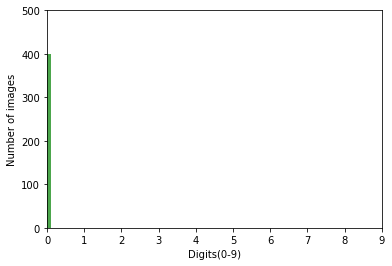

In [8]:
plot_hist(y_train_400)

Oh shoot! we wanted our data set to cover a range between **0 to 9**. But our logic to split the data set is flawed. i.e. looks like we only have images of **'0'**. If we build a model with above data set, it fails to classify the digits properly. So, our immideate next step is to get the evenly distributed samples of data.

### Step 2: Get evenly distributed data samples

There are many ways you can do it. But I'm choosing the **pandas** to do the data splitting job for me. Let us see how we can do that.

In [9]:
import pandas as pd

In [10]:
x_train_df = pd.DataFrame(mnist.data)
y_train_df = pd.DataFrame(mnist.target)
#y_train_df.head(5)
#x_train_df.head(5)
x_train_df.shape, y_train_df.shape

((70000, 784), (70000, 1))

In [11]:
dataset=pd.concat([x_train_df,y_train_df],axis=1)
dataset.shape

(70000, 785)

Now let us select some samples to get the evenly distributed data which we are interested in.

In [12]:
dataset_500=dataset.sample(500,axis=0,random_state=1)
dataset_500.shape

(500, 785)

In [13]:
labels=dataset_500.iloc[:,-1]
dataset_500 = dataset_500.iloc[:, :-1]
dataset_500.shape,labels.shape

((500, 784), (500,))

In [14]:
labels.value_counts()

2.0    59
7.0    54
1.0    54
4.0    52
0.0    51
8.0    51
6.0    49
9.0    47
3.0    42
5.0    41
Name: 0, dtype: int64

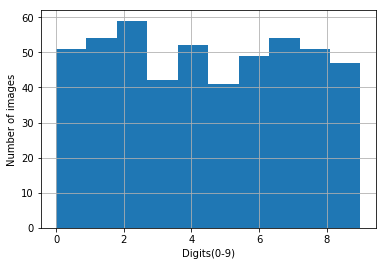

In [15]:
labels.hist()
plt.xlabel('Digits(0-9)')
plt.ylabel('Number of images')
plt.show()

Our data distribution looks good. Now we can split our data in to training and testing test. Let us do it by using the sklearn **train_test_split** utility.

In [16]:
from sklearn.model_selection import train_test_split
train_img_df, test_img_df, train_lbl_df, test_lbl_df = train_test_split(
 dataset_500, labels, test_size=0.2, random_state=1)
train_img_df.shape,test_img_df.shape,train_lbl_df.shape, test_lbl_df.shape

((400, 784), (100, 784), (400,), (100,))

In [17]:
type(train_img_df)

pandas.core.frame.DataFrame

Since we took panda's help in getting our data distribution issue sorted. We still have the data in panda's dataframe format.But we need the data in numpy array format. Let us convert the dataframe in to np.array().

In [18]:
train_img = np.array(train_img_df.values.tolist())
test_img = np.array(test_img_df.values.tolist())
train_lbl = np.array(train_lbl_df.values.tolist())
test_lbl = np.array(test_lbl_df.values.tolist())

## Train-data image distribution

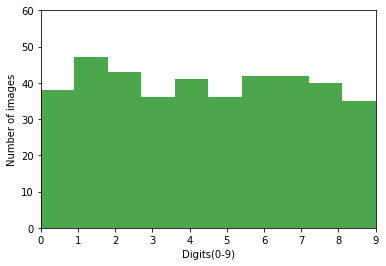

In [19]:
plot_hist(train_lbl,ylim=60)

### Test-data image distribution

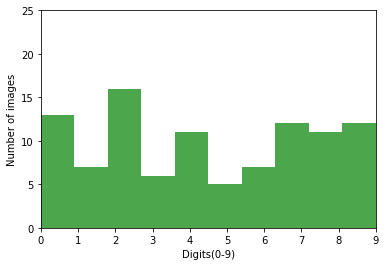

In [20]:
plot_hist(test_lbl,ylim=25)

If the distribution dosn't look good, just re-run the cells where we did  **dataset.sample(500,axis=0,random_state=1)** with **random_state=0** couple of times to get the image distribution as shown above. 

### Step 3: Visualize images


In [21]:
import numpy as np

In [22]:
def visualize(ims, figsize=(8,8), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)/rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [23]:
x_imgs = np.reshape(train_img, (-1,28,28)); x_imgs.shape

(400, 28, 28)

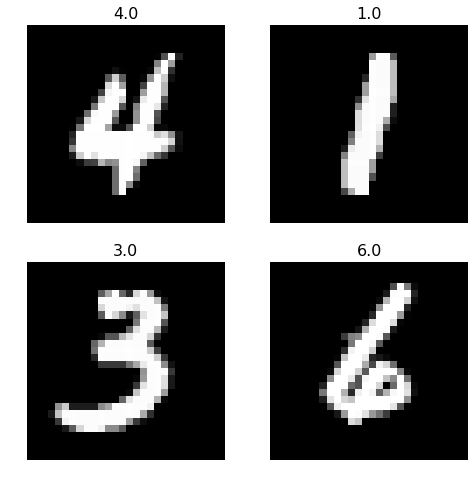

In [24]:
visualize(x_imgs[20:24],titles=train_lbl[20:24])

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

For now just run with the default values of the Logistic regressor.

**TODO:** play around with the parameters to get better accuracy.

In [26]:
logisticRegr = LogisticRegression()

In [27]:
logisticRegr.fit(train_img, train_lbl)

/home/santhosh/projects/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/santhosh/projects/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let us predict and see how well our model is doing.

pridict on single image.

In [28]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([0.])

In [29]:
test_lbl[0]

0.0

Predict on multiple images

In [30]:
predict_lables = logisticRegr.predict(test_img[10:20])
predict_lables,test_lbl[10:20]

(array([1., 6., 6., 2., 7., 4., 7., 9., 9., 4.]),
 array([1., 6., 6., 2., 7., 4., 9., 9., 9., 4.]))

Looks like there are some images which are being misclassified. Let us try to visualize them to get better clarity.

In [31]:
predict_img = np.reshape(test_img, (-1,28,28)); predict_img.shape

(100, 28, 28)

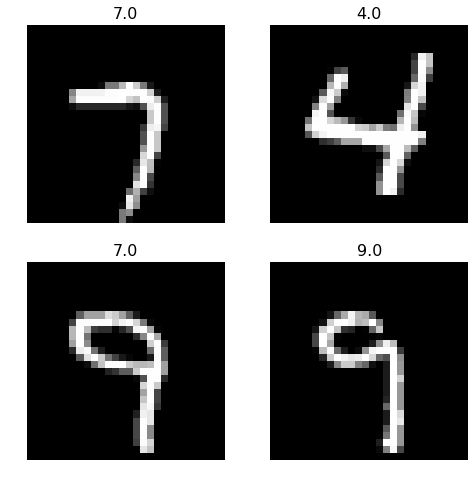

In [32]:
visualize(predict_img[14:18],titles=predict_lables[4:8])

Okay, it is clear from the above visualization that some digts are misclassified. In the image above **9 is being misclassified as 7**. Let us see what is the accuracy of our model.

In [33]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.81


Looks like our model is only **81% accuracate**. That means we need to fine tune some parameters to achive better accracy. 

Also, let us see how our model is performing using a metric called confusion matrix. To build the confusion matrix we need to have the predictions of all our test images. Getting them is very easy as shown below.

In [34]:
predictions = logisticRegr.predict(test_img)
predictions, test_lbl

### Performance measure using confusion matrix

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [36]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[13  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0]
 [ 0  1 10  1  0  0  1  0  2  1]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  1  0  8  0  0  0  0  2]
 [ 1  0  0  0  0  3  0  0  1  0]
 [ 0  0  1  0  0  0  6  0  0  0]
 [ 0  1  0  0  0  0  0 11  0  0]
 [ 0  0  0  1  0  0  0  0  9  1]
 [ 1  0  0  1  1  0  0  1  0  8]]


Above confusion matrix in text output is not that appealing. Lets use some magic of seaborn and beautify the confusion matrix more visaually appealing.

In [37]:
def plotConfusionMatrix(cm):
    plt.figure(figsize=(9,9))
    #sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
    sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

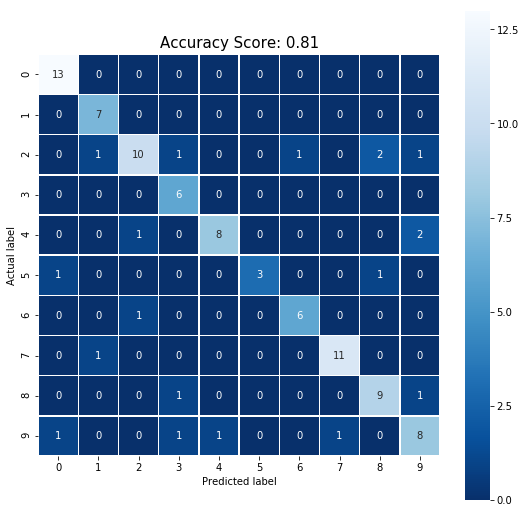

In [39]:
plotConfusionMatrix(cm)

Much better and very pleasing effect on eyes. Let us try to understand the confusion matrix of our model a bit. Let us go over it column by column.

1st column is labled-0 that means it is the prediction values for 0. There are 15 (add all the number in column zero) zero's in our test sample it classified 13 of them correctly as zero. But it calssified 2 images incorrectly as 5 and 9.

Similarly we can go over each of the columns for each of the each digits to understand which images our model is classifying correctly or misclassifying. Color map on the right hand side helps us visualy identify the same. As we move from darker shade of blue to ligher shade, our model is performing better. For example digits 0,7,2 are better classified than digits 5,1 and 6 etc.



### Save the Model

Once we are happy with our model, we can save it in pickle format and re-load it in our deployment model.

In [40]:
import pickle

In [41]:
filename = 'logistic_regression_model_default.pkl'
pickle.dump(logisticRegr, open(filename, 'wb'))

## K-NN Classifier for MNIST dataset

We have already gone over aquiring evenly distributed samples of data aggregation process. It is the same process if we are doing the logisticRegression or K-NN or any other classifier. If we want KNN to be done in a different notebook, just copy paste first few cells (step-1 to step-3) of this notebook we are all good.
I also assume we all know what is K Nearest Neighbour algorithm is and how it works etc. So lets directly jump in to building a model using sklearn's KNN implementation.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier()
knnModel.fit(train_img,train_lbl)
knnModel.predict(test_img[0].reshape(1,-1))

array([0.])

That is it! all we need is just 4 lines of code in python to create a model from K-NN algorithm. Default KNeighborsClassifier() uses n_neighbours = 5. But for our model to work better we need to choose the value of k which gives the best accuracy. Let us see how we can do that.

Creating a method knn() for the convenience of testing with different parameters quickly, without repeating code. Advantages is quite profound which we see below.

In [43]:
def knn(algo='auto',leafSize=30):
    # initialize the values of k for our k-Nearest Neighbor classifier along with the
    # list of accuracies for each value of k
    kVals = range(1, 30, 2)
    accuracies = []

    # loop over various values of `k` for the k-Nearest Neighbor classifier
    for k in range(1, 30, 2):
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, algorithm=algo, leaf_size=leafSize)
        model.fit(train_img, train_lbl)

        # evaluate the model and update the accuracies list
        score = model.score(test_img, test_lbl)
        print('k = {}, accuracies = {}'.format(k, (score*100)))
        accuracies.append(score)

    # find the value of k that has the largest accuracy
    i = int(np.argmax(accuracies))
    print('k = {} achieved highest accuracy of {}.'.format(kVals[i],accuracies[i]*100))
    return

In [44]:
knn()

k = 1, accuracies = 84.0
k = 3, accuracies = 80.0
k = 5, accuracies = 79.0
k = 7, accuracies = 80.0
k = 9, accuracies = 79.0
k = 11, accuracies = 77.0
k = 13, accuracies = 76.0
k = 15, accuracies = 74.0
k = 17, accuracies = 74.0
k = 19, accuracies = 73.0
k = 21, accuracies = 72.0
k = 23, accuracies = 69.0
k = 25, accuracies = 69.0
k = 27, accuracies = 68.0
k = 29, accuracies = 67.0
k = 1 achieved highest accuracy of 84.0.


From the above list it looks like k=1 giving the best accuracy! But choosing the value of k = 1 is not a good option. For this model we will take k=3 instead of 1 and continue with our work. Ofcourse need to finetune the parameters and see if there is any improvements in the accuracy.

In [45]:
knn(algo='kd_tree',leafSize=50)

k = 1, accuracies = 84.0
k = 3, accuracies = 80.0
k = 5, accuracies = 79.0
k = 7, accuracies = 80.0
k = 9, accuracies = 79.0
k = 11, accuracies = 77.0
k = 13, accuracies = 76.0
k = 15, accuracies = 74.0
k = 17, accuracies = 74.0
k = 19, accuracies = 73.0
k = 21, accuracies = 72.0
k = 23, accuracies = 69.0
k = 25, accuracies = 69.0
k = 27, accuracies = 68.0
k = 29, accuracies = 67.0
k = 1 achieved highest accuracy of 84.0.


In [46]:
knn(algo='ball_tree')

k = 1, accuracies = 84.0
k = 3, accuracies = 80.0
k = 5, accuracies = 79.0
k = 7, accuracies = 80.0
k = 9, accuracies = 79.0
k = 11, accuracies = 77.0
k = 13, accuracies = 76.0
k = 15, accuracies = 74.0
k = 17, accuracies = 74.0
k = 19, accuracies = 73.0
k = 21, accuracies = 72.0
k = 23, accuracies = 69.0
k = 25, accuracies = 69.0
k = 27, accuracies = 68.0
k = 29, accuracies = 67.0
k = 1 achieved highest accuracy of 84.0.


Okay it is clear that playing around with the algorithm is not helping much. So we keep the algorithm='auto' in our final model.

In [47]:
knn(leafSize=10)

k = 1, accuracies = 84.0
k = 3, accuracies = 80.0
k = 5, accuracies = 79.0
k = 7, accuracies = 80.0
k = 9, accuracies = 79.0
k = 11, accuracies = 77.0
k = 13, accuracies = 76.0
k = 15, accuracies = 74.0
k = 17, accuracies = 74.0
k = 19, accuracies = 73.0
k = 21, accuracies = 72.0
k = 23, accuracies = 69.0
k = 25, accuracies = 69.0
k = 27, accuracies = 68.0
k = 29, accuracies = 67.0
k = 1 achieved highest accuracy of 84.0.


In [48]:
knn(leafSize=20)

k = 1, accuracies = 84.0
k = 3, accuracies = 80.0
k = 5, accuracies = 79.0
k = 7, accuracies = 80.0
k = 9, accuracies = 79.0
k = 11, accuracies = 77.0
k = 13, accuracies = 76.0
k = 15, accuracies = 74.0
k = 17, accuracies = 74.0
k = 19, accuracies = 73.0
k = 21, accuracies = 72.0
k = 23, accuracies = 69.0
k = 25, accuracies = 69.0
k = 27, accuracies = 68.0
k = 29, accuracies = 67.0
k = 1 achieved highest accuracy of 84.0.


As we can see we tried to play around with few of the parameters to see if there is any parameters which we can fine tune to get better accuracy. Thanks to knn() method, we were able to run multiple tests quickly with minimal effort. We found that we are getting 79% accuracy with default value of k=5. But if we use k=3 we get 80% accuracy. So we stick with k=3 in our model.

But as we observed from our experiments above, changing the algorithm type or leaf size etc didn't have any impact on the model at all. This is a clear indication for us that we need to play with our image data set and not just the parameters.

Playing with images, I mean, create your own new image data sets out of existing data sets by doing some image **Augumentation**.

For example here is the list of sample **image agumentation** we can do.
- rotate the image say about $5\,^{\circ}$ to the left or $5\,^{\circ}$ to the right
- Add a slight blurring effect on the image.
- Add some random noice on the image.
- Slightly crop the image. without losing the digits in the center.
- Dilate/errode the image
etc. 

There is no limit on the options available on image augumentation.

**NOTE**: We need to be extreamly careful about what type of agumentation we are doing on MNIST kind of data set. For example, we should not do flip or rotate on the MNIST data set or the dataset where we are trying to classify the text. If we rotate an image of **6 by $180\,^{\circ}$ then image becomes 9**. Which is not correct. Similarly if we flip digit **7** it loses its meaning. So we need to be careful in identifying the type of agumentation which are willing to apply on the images.

As we can see, we can always use image augumentation method in our advantage to increase the amount of images for training and testing purpose, when we have a limited dataset at our disposal. **So image augumentation makes perfect candiate for this problem set, as we are restricted to use only 500 images. More images implies more information for our model to learn, which implies better accuracy.**

Applying image agumentation on each of the images and preparing our data again is going to be bit involved and time consuming. Hence I'm not going do image agumentation as part of my solution. As getting the 100% accuracy on this model is not the end goal of this project.

Now let us quickly create a KNN model with k=3 and save it in pickle format as earlier to use it in our classifier model

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(train_img,train_lbl)
#knnModel.predict(test_img[0].reshape(1,-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
# import pickle
knnPickleFile = 'knn_model_K_3.pkl'
pickle.dump(logisticRegr, open(knnPickleFile, 'wb'))

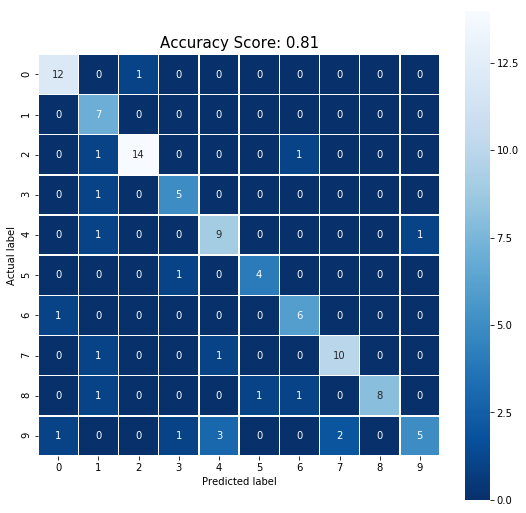

In [53]:
predictions = knnModel.predict(test_img)
cm = metrics.confusion_matrix(test_lbl, predictions)
#print(cm)
plotConfusionMatrix(cm)

Above figure shows the confusion matrix for the KNN model. As we can observe from the diagonal values. KNN model is better at classifiying different set of digits compared to Logistic regression model.

### CNN using Keras and Tensor flow backend

As earlier follow the step-1 to step-3 to get the data. Ofcourse keras has its own way of getting the MNIST data, which we are not interested here. We assume we already have the required evenly distributed data with us and train our CNN model on that.
We will build a very simple CNN model with couple of hidden layers.

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [55]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [56]:
cnn_train_img = train_img_df.values.reshape(400,28,28,1)
cnn_test_img = test_img_df.values.reshape(100,28,28,1)
cnn_train_img.shape, cnn_test_img.shape

((400, 28, 28, 1), (100, 28, 28, 1))

In [57]:
from keras.utils import to_categorical

cnn_train_lbl = to_categorical(train_lbl_df)
cnn_test_lbl = to_categorical(test_lbl_df)
num_classes = cnn_test_lbl.shape[1]
cnn_train_lbl.shape, cnn_test_lbl.shape

((400, 10), (100, 10))

In [58]:
def simple_cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Here is the description of the CNN
- The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. - - Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
- The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
- Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
- Next a fully connected layer with 128 neurons and rectifier activation function.
- Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [63]:
# build the model
cnn_model = simple_cnn_model()
# Fit the model
cnn_model.fit(cnn_train_img, cnn_train_lbl, validation_data=(cnn_test_img, cnn_test_lbl), epochs=70, batch_size=400, verbose=2)
# Final evaluation of the model
scores = cnn_model.evaluate(cnn_test_img, cnn_test_lbl, verbose=0)
print("Error: {}".format(100-scores[1]*100))

Train on 400 samples, validate on 100 samples
Epoch 1/70
 - 1s - loss: 13.7923 - acc: 0.1000 - val_loss: 12.5197 - val_acc: 0.2200
Epoch 2/70
 - 0s - loss: 12.0862 - acc: 0.2450 - val_loss: 10.5668 - val_acc: 0.3300
Epoch 3/70
 - 0s - loss: 10.4127 - acc: 0.3425 - val_loss: 10.1549 - val_acc: 0.3700
Epoch 4/70
 - 0s - loss: 9.4906 - acc: 0.3875 - val_loss: 9.8222 - val_acc: 0.3800
Epoch 5/70
 - 0s - loss: 8.7522 - acc: 0.4350 - val_loss: 9.5226 - val_acc: 0.3900
Epoch 6/70
 - 0s - loss: 8.4675 - acc: 0.4625 - val_loss: 9.5097 - val_acc: 0.4100
Epoch 7/70
 - 0s - loss: 7.9136 - acc: 0.5000 - val_loss: 9.8369 - val_acc: 0.3700
Epoch 8/70
 - 0s - loss: 8.2698 - acc: 0.4775 - val_loss: 10.0040 - val_acc: 0.3700
Epoch 9/70
 - 0s - loss: 8.5808 - acc: 0.4575 - val_loss: 9.9932 - val_acc: 0.3800
Epoch 10/70
 - 0s - loss: 8.8332 - acc: 0.4425 - val_loss: 9.5097 - val_acc: 0.4100
Epoch 11/70
 - 0s - loss: 8.2626 - acc: 0.4875 - val_loss: 9.5097 - val_acc: 0.4100
Epoch 12/70
 - 0s - loss: 8.1462

As we can see our CNN model is barely reaching the accuracy of 78% Which is not typical for CNN model. This could be because any neural network will train itself better when it has lots of images at its disposal. But we are tyring to restrict our model to use only 500 images (train (400)+ test (100) images). Hence our model is struggling a bit. As discussed earlier we can use the image agumentation process to get more data for ourselves from the existing images. Which is certainly will be my top of priority if I had more time to do this assignment.

In [64]:
pred = cnn_model.predict_classes(np.reshape(test_img[9],(1,28,28,1)))

#### Save keras model as json file and weights as HDF5 format

In [73]:
# serialize model to JSON
model_json = cnn_model.to_json()
with open("cnn_model_test.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn_model.save_weights("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


### Load the model from disk. This is for testing purpose only need to move it to the new notebook.

In [74]:
from keras.models import model_from_json
# load json and create model
json_file = open('cnn_model_test.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
score = loaded_model.evaluate(cnn_test_img, cnn_test_lbl, verbose=0)
print("{}: {}".format(loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 60.0


In [75]:
y=loaded_model.predict_classes(np.reshape(cnn_test_img[30],(1,28,28,1)))
y, cnn_test_lbl[30]

(array([6]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))